***Лабораторная работа №3***

Работу выполнил Ширко Максим Андреевич, группа 2371.

Задание на лабораторную работу:
1. Необходимо оценить и сравнить результаты классификации, используя следующие
алгоритмы классификации:
* kNN
* дерево решений

2. Сравните полученные результаты с помощью различных метрик оценки качества:
* Accuracy
* Presicion, Recall, F-measure
* ROC

3. Объяснить полученные результаты:
Отчет должен включать описания выполнения каждой подзадачи.

Информация о выбранном датасете: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

---

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Отображение первых нескольких строк
print(df.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

Проведем проверку на сбалансированность классов. Будем рассматривать пол посетителей зала.

In [11]:
# Преобразование гендера в бинарный класс
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Оценка сбалансированности классов
class_counts = df['Gender'].value_counts()
print("Распределение классов:\n", class_counts)

Распределение классов:
 Gender
1    511
0    462
Name: count, dtype: int64


Распределение (0 - Ж, 1 - М) оказалось сбалансированным - разница примерно 5%. Для классов ***не требуется*** балансировка.

In [14]:
# Удаление текстовых столбцов
df = df.select_dtypes(include=[np.number])

Так как работаем только с числовыми данными, текстовые удаляем.

In [17]:
# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['Gender'])
y = df['Gender']

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Тестовую выборку ставим 20% так как мало записей в датасете.

In [20]:
# kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)[:, 1]  # Для ROC AUC

# Дерево решений
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt_prob = dt.predict_proba(X_test)[:, 1]  # Для ROC AUC

# Метрики оценки
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"Метрики для {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_prob):.2f}")
    print(classification_report(y_true, y_pred))

# Оценка kNN
evaluate_model(y_test, y_pred_knn, y_pred_knn_prob, "kNN")

# Оценка дерева решений
evaluate_model(y_test, y_pred_dt, y_pred_dt_prob, "Decision Tree")

Метрики для kNN:
Accuracy: 0.93
Precision: 0.95
Recall: 0.91
F1-score: 0.93
ROC AUC: 0.97
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        98
           1       0.95      0.91      0.93        97

    accuracy                           0.93       195
   macro avg       0.93      0.93      0.93       195
weighted avg       0.93      0.93      0.93       195

Метрики для Decision Tree:
Accuracy: 0.95
Precision: 0.94
Recall: 0.97
F1-score: 0.95
ROC AUC: 0.95
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        98
           1       0.94      0.97      0.95        97

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195



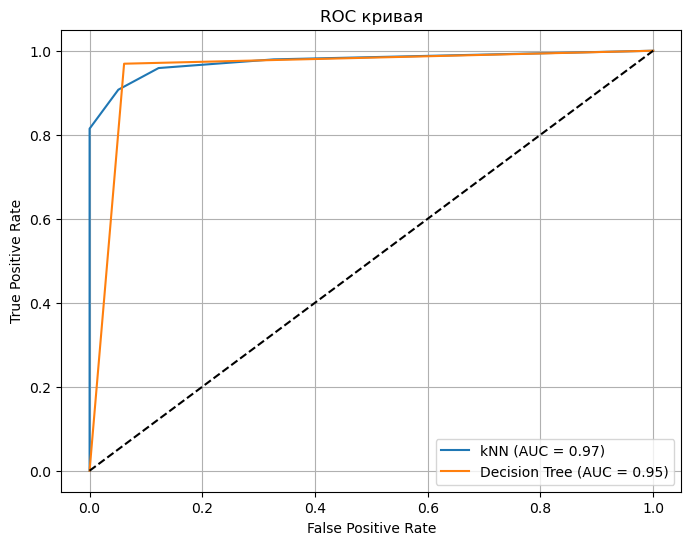

In [22]:
# Функция ROC-кривой
def plot_roc_curve(y_true, y_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_true, y_prob):.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC кривая")
    plt.legend(loc="lower right")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_pred_knn_prob, "kNN")
plot_roc_curve(y_test, y_pred_dt_prob, "Decision Tree")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.grid()
plt.show()

---
**Вывод:**

**Результаты классификации для класса 0 (Female)**

<table>
  <tr>
    <th>Модель</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F-score</th>
  </tr>
  <tr>
    <td>kNN</td>
    <td>0.91</td> <!-- Здесь замените на значение Precision для класса 0 -->
    <td>0.95</td> <!-- Здесь замените на значение Recall для класса 0 -->
    <td>0.93</td> <!-- Здесь замените на значение F-score для класса 0 -->
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.97</td> <!-- Здесь замените на значение Precision для класса 0 -->
    <td>0.94</td> <!-- Здесь замените на значение Recall для класса 0 -->
    <td>0.95</td> <!-- Здесь замените на значение F-score для класса 0 -->
  </tr>
</table>

Decision Tree показал несколько лучшие результаты, чем kNN, с более высоким значением Precision (0.97), что указывает на его способность с высокой точностью классифицировать класс 0. Однако обе модели демонстрируют хорошие показатели для этого класса, с небольшими различиями в Recall и F-score.

**Результаты классификации для класса 1 (Male)**

<table>
  <tr>
    <th>Модель</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F-score</th>
  </tr>
  <tr>
    <td>kNN</td>
    <td>0.95</td> <!-- Здесь замените на значение Precision для класса 1 -->
    <td>0.91</td> <!-- Здесь замените на значение Recall для класса 1 -->
    <td>0.93</td> <!-- Здесь замените на значение F-score для класса 1 -->
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.94</td> <!-- Здесь замените на значение Precision для класса 1 -->
    <td>0.97</td> <!-- Здесь замените на значение Recall для класса 1 -->
    <td>0.95</td> <!-- Здесь замените на значение F-score для класса 1 -->
  </tr>
</table>

Decision Tree показал лучшую способность к обнаружению примеров класса 1, что выражается в более высоком Recall. kNN имеет немного более высокую точность, но оно пропускает больше примеров класса 1. Оба алгоритма демонстрируют хорошие результаты для этого класса, с более высокими значениями F-score.

Decision Tree (Accuracy: 0.95) обладает немного более высокой общей точностью, чем kNN (Accuracy: 0.93).

Обе модели показывают хорошие результаты на ROC кривой, имея большую площадь охвата данных, однако у модели kNN площадь чуть больше. Таким образом модель kNN будет чуть-более предпочтительнее в данной обработке.